In [1]:
import matplotlib.pyplot as plt
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
from module.for_dataset.normalization import normalization
from module.for_model.checkpoint import save_checkpoint

# Construct dataset

In [2]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

In [3]:
for x, y , idx in zip(X_train[:5], Y_train[:5], range(len(Y_train))):
    print(f"{idx}\tx = {x},\tY = {y}")

0	x = [-0.11583055  0.00063256],	Y = 0
1	x = [ 1.13383334 -0.11858177],	Y = 1
2	x = [ 0.96636156 -0.04787412],	Y = 1
3	x = [1.06442637 0.1242411 ],	Y = 1
4	x = [ 1.42946384 -0.23159094],	Y = 1


### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [4]:
X_train.shape

(16000, 2)

(array([[1208., 1081., 1098., 1146., 1135., 1093., 1122.,    0.,    0.,
            0.,    0.,    0.,    0., 1173., 1192., 1167., 1164., 1170.,
         1116., 1135.],
        [1136., 1169., 1180., 1112., 1126., 1159., 1140.,    0.,    0.,
            0.,    0.,    0.,    0., 1131., 1152., 1138., 1134., 1076.,
         1170., 1177.]]),
 array([-4.99948410e-01, -3.99952792e-01, -2.99957175e-01, -1.99961557e-01,
        -9.99659388e-02,  2.96791545e-05,  1.00025297e-01,  2.00020915e-01,
         3.00016533e-01,  4.00012151e-01,  5.00007769e-01,  6.00003387e-01,
         6.99999005e-01,  7.99994622e-01,  8.99990240e-01,  9.99985858e-01,
         1.09998148e+00,  1.19997709e+00,  1.29997271e+00,  1.39996833e+00,
         1.49996395e+00]),
 <a list of 2 BarContainer objects>)

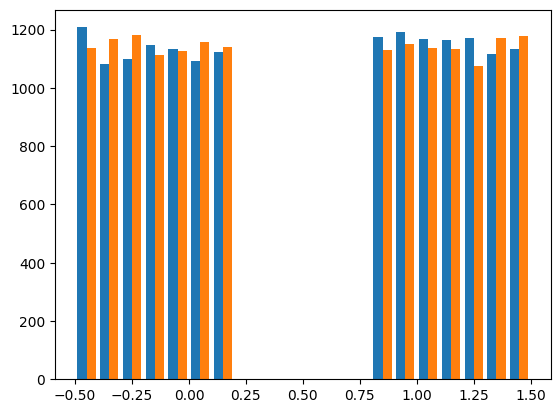

In [5]:
plt.hist(X_train, bins=20)

(array([[301., 289., 271., 286., 281., 279., 291.,   0.,   0.,   0.,   0.,
           0.,   0., 277., 273., 264., 262., 294., 318., 314.],
        [261., 291., 282., 296., 284., 259., 304.,   0.,   0.,   0.,   0.,
           0.,   0., 297., 273., 295., 289., 287., 285., 297.]]),
 array([-4.99617825e-01, -3.99638663e-01, -2.99659502e-01, -1.99680340e-01,
        -9.97011787e-02,  2.77982773e-04,  1.00257144e-01,  2.00236306e-01,
         3.00215467e-01,  4.00194629e-01,  5.00173790e-01,  6.00152952e-01,
         7.00132113e-01,  8.00111275e-01,  9.00090436e-01,  1.00006960e+00,
         1.10004876e+00,  1.20002792e+00,  1.30000708e+00,  1.39998624e+00,
         1.49996540e+00]),
 <a list of 2 BarContainer objects>)

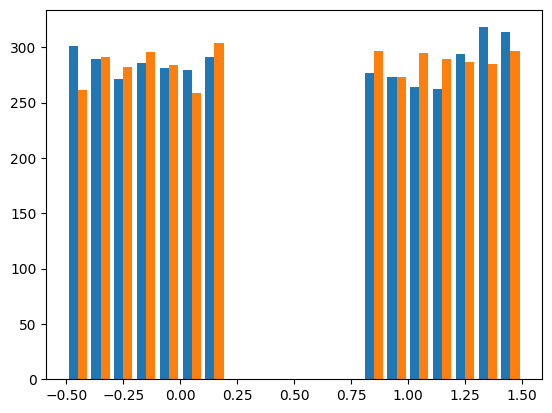

In [6]:
plt.hist(X_test, bins=20)

(array([8035.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7965.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

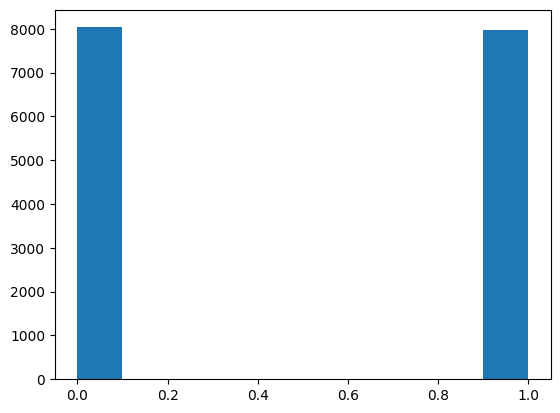

In [7]:
plt.hist(Y_train)

(array([2023.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1977.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

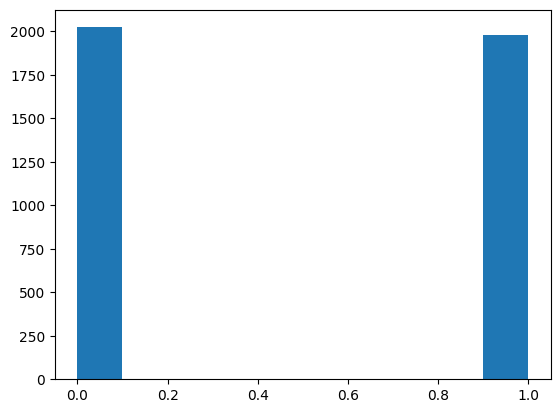

In [8]:
plt.hist(Y_test)

#### 正規化

In [9]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [10]:
normalizer = normalization(X_train)
X_train_n = normalizer.normalize(X_train)
Y_train_n = normalizer.normalize(Y_train)
X_test_n = normalizer.normalize(X_test)
Y_test_n = normalizer.normalize(Y_test)

(array([[1208., 1081., 1098., 1146., 1135., 1093., 1122.,    0.,    0.,
            0.,    0.,    0.,    0., 1173., 1192., 1167., 1164., 1170.,
         1116., 1135.],
        [1136., 1169., 1180., 1112., 1126., 1159., 1140.,    0.,    0.,
            0.,    0.,    0.,    0., 1131., 1152., 1138., 1134., 1076.,
         1170., 1177.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

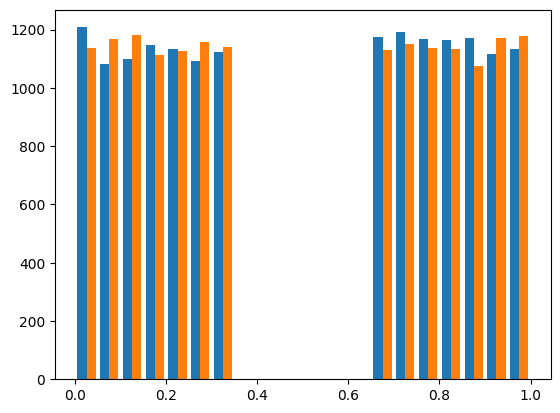

In [11]:
plt.hist(normalizer.normalize(X_train), bins=20)

In [12]:
data = [X_train_n, Y_train, X_test_n, Y_test]

In [13]:
X_train_n

array([[0.19206735, 0.25030145],
       [0.81692667, 0.19069168],
       [0.73318711, 0.22604705],
       ...,
       [0.71643269, 0.23391854],
       [0.94581912, 0.20586158],
       [0.14859593, 0.70514023]])

In [14]:
Y_train_n

array([[0.24998516],
       [0.75000707],
       [0.75000707],
       ...,
       [0.75000707],
       [0.75000707],
       [0.75000707]])

In [15]:
# 為了之後畫動畫
data_2_save = [X_train_n, Y_train.flatten(), X_test_n, Y_test.flatten()]
import pickle
path_folder = "data\\xor_normalized"
path_loss = f"{path_folder}\\2024_0610_1241_part3.pkl"
with open(path_loss, 'wb') as f:
    pickle.dump(data_2_save, f)

# Train and Record

In [16]:
name_experiment = "2024_0610_1241_part3"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{name_experiment}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(30):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 1
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

save_checkpoint(path_folder, loss_n, param_n)

	layer_initializer = 0
	layer_initializer = 1
	layer_initializer = 2
	layer_initializer = 3
	layer_initializer = 4
	layer_initializer = 5
	layer_initializer = 6
	layer_initializer = 7
	layer_initializer = 8
	layer_initializer = 9
	layer_initializer = 10
	layer_initializer = 11
	layer_initializer = 12
	layer_initializer = 13
	layer_initializer = 14
	layer_initializer = 15
	layer_initializer = 16
	layer_initializer = 17
	layer_initializer = 18
	layer_initializer = 19
	layer_initializer = 20
	layer_initializer = 21
	layer_initializer = 22
	layer_initializer = 23
	layer_initializer = 24
	layer_initializer = 25
	layer_initializer = 26
	layer_initializer = 27
	layer_initializer = 28
	layer_initializer = 29


('checkpoints\\2024_0610_1241_part3\\node_02\\loss.pkl',
 'checkpoints\\2024_0610_1241_part3\\node_02\\param.pkl')